In [9]:
%cd ~/agave

/home/jovyan/agave


<h2>Fun With Visualization</h2>

The examples in this section are designed for use with Funwave's output, which is nothing more than an ascii array of floating point values separated by whitespace. This happens to be the ideal format for matplotlib's genfromtxt() function to consume.

In [10]:
%cd ~/agave

# IMPORT SOME USEFUL PACKAGES

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')

/home/jovyan/agave


In [11]:
# SLURP IN THE DATA

frames = []
for i in range(1,11):
    frames += [np.genfromtxt("output/eta_%05d" % i)]

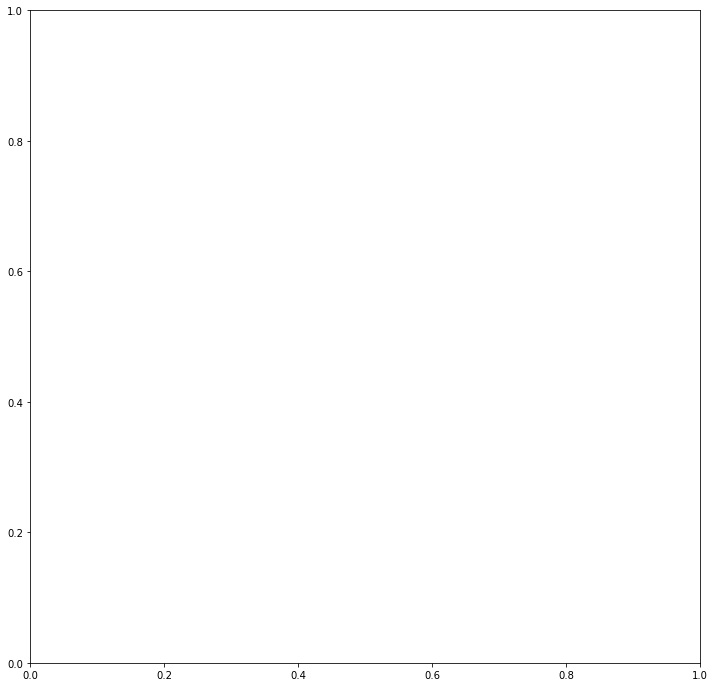

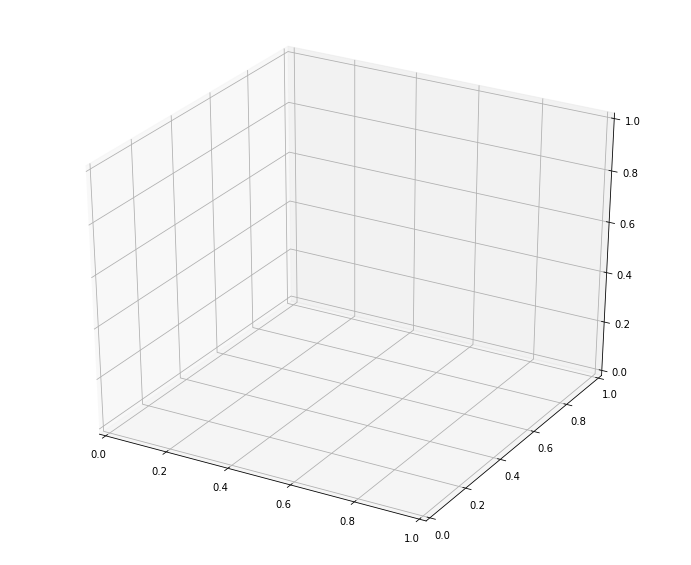

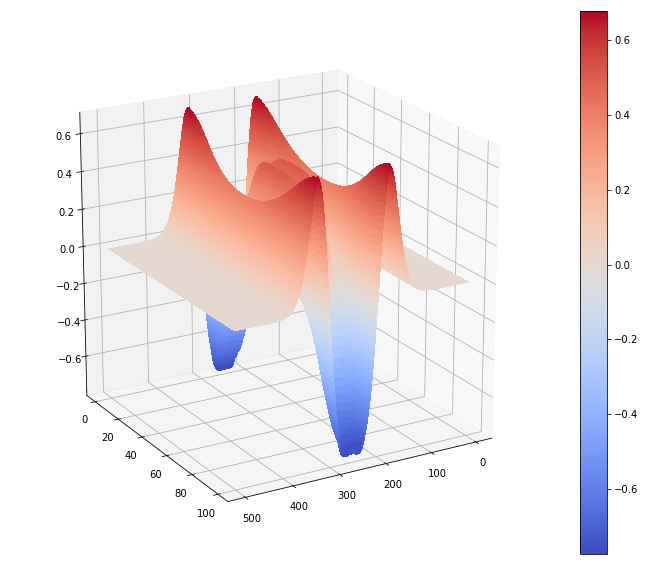

In [12]:
# Your basic surface plot of the last frame 

f = frames[9]
xv = np.linspace(0,f.shape[1],f.shape[1])
yv = np.linspace(0,f.shape[0],f.shape[0])
x2,y2 = np.meshgrid(xv,yv)
fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')
ax.clear()
# This is the viewing angle, theta and phi
ax.view_init(20,60)
# For more colormaps, see https://matplotlib.org/examples/color/colormaps_reference.html
# The strides make the image really sharp. They slow down the rendering, however.
surf = ax.plot_surface(x2, y2, f, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, rstride=1, cstride=1)
fig.colorbar(surf)
plt.show()

In [13]:
# Your basic animation of the color plot

fig2, ax = plt.subplots(figsize=(12,12))

def animate(i):
    ax.clear()
    pltres = plt.imshow(frames[i])
    return pltres,

anim = animation.FuncAnimation(fig2, animate, frames=10, interval=200, repeat=True)
HTML(anim.to_html5_video())

In [14]:
# A rotating plot that cycles through the frames

fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')
zmin = np.min(frames[0])
zmax = np.max(frames[0])
for i in range(1,10):
    zmin = min(zmin,np.min(frames[i]))
    zmax = max(zmax,np.max(frames[i]))

def animate(i):
    global ax
    ax.clear()
    # Change the viewing angle
    ax.view_init(20,i*6)
    ax.set_zlim(top=zmax,bottom=zmin)
    # Cycle through the frames
    f = frames[i % 10]
    # vmax and vmin control the color normalization
    surf = ax.plot_surface(x2, y2, f, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, vmax=zmax, vmin=zmin)
    return surf,

anim = animation.FuncAnimation(fig, animate, frames=36, interval=200, repeat=True)
HTML(anim.to_html5_video())

# Other things you might want to set: https://matplotlib.org/mpl_toolkits/mplot3d/api.html

<h3>A final word about movies.... </h3>
There's a download button on the bottom right of the animations that will give you an mp4 file. You can use the ImageMagick conversion utility to turn that into an animated gif, suitable for pasting on your website.

However, surface plots aren't the only interesting kind of data to explore in funwave. Funwave also provides the wave direction vectors, u (x-direction) and v (y-direction). You can view the vector fields (with color-coded direction) using quiver.

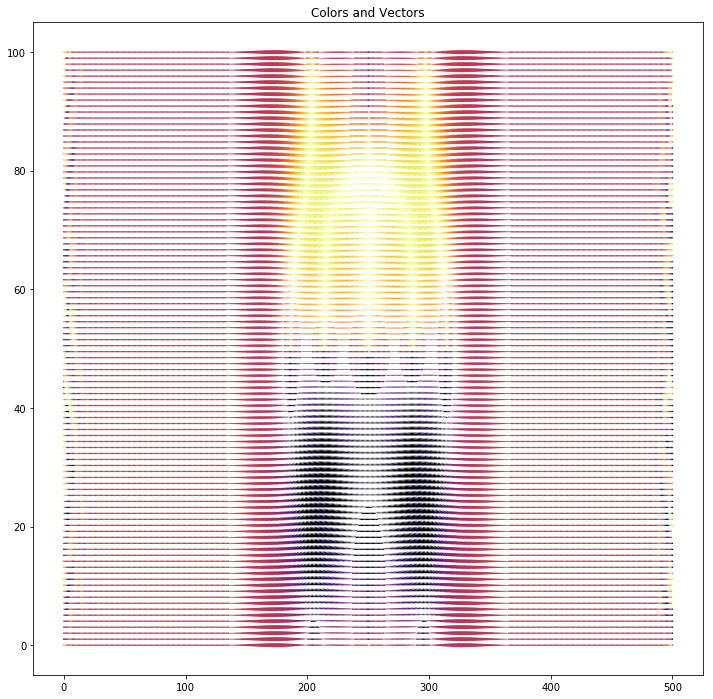

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

U = np.genfromtxt("output/u_00010")
V = np.genfromtxt("output/v_00010")
C = np.abs(np.arctan2(U,V))

plt.figure(figsize=(12,12))
plt.title('Colors and Vectors')
Q = plt.quiver(x2, y2, U, V, C, cmap=cm.inferno, units='width')
plt.show()

Because it's hard to see the vectors on the plot above, we zoom in on one section of the grid.

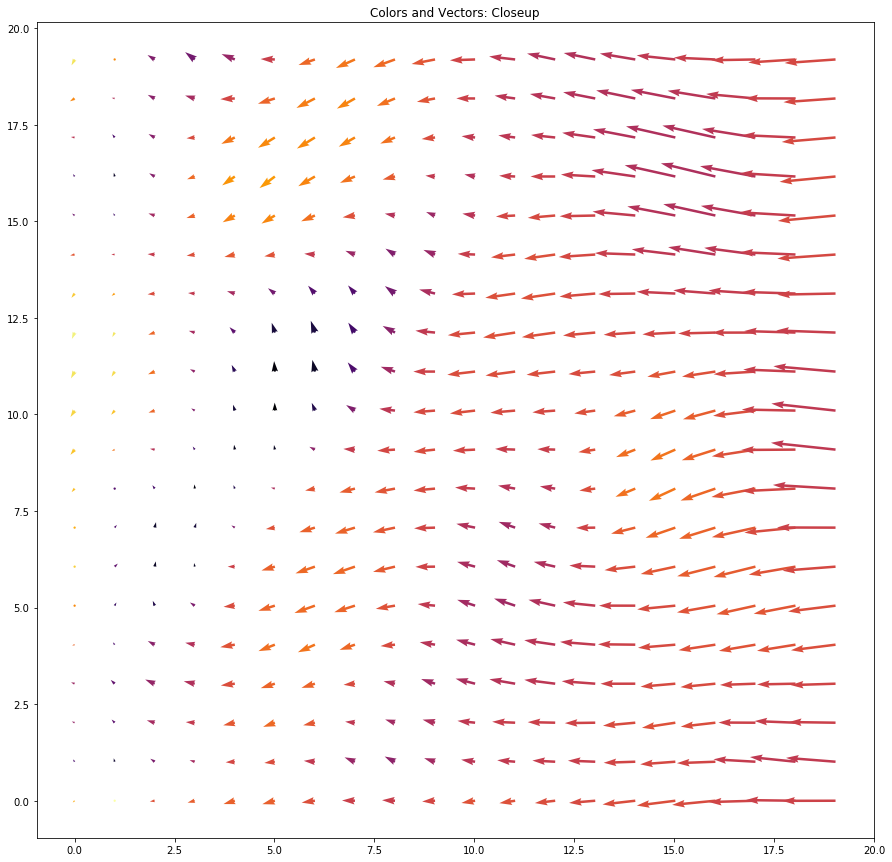

In [33]:
# Adjust these numbers to zoom in on a different section of the grid.
# If it doesn't work, reloading fixes.
lox = 0
hix = 20
loy = 0
hiy = 20

plt.figure(figsize=(15,15))
plt.title('Colors and Vectors: Closeup')
Q = plt.quiver(x2[lox:hix,loy:hiy],
               y2[lox:hix,loy:hiy], 
               U[lox:hix,loy:hiy],
               V[lox:hix,loy:hiy],
               C[lox:hix,loy:hiy], cmap=cm.inferno, units='width')
plt.show()